# Import Libraries

In [1]:
import glob
import time
import timeit
import pickle
import requests
import json
import re
import numpy as np
import pandas as pd
from multiprocessing import Pool
from matplotlib import pyplot as plt
from zipfile import ZipFile
import lxml.etree as etree
import xmlschema
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import combinations
from matplotlib.patches import Patch
import distinctipy

# If 'get_career' is a custom module you've created, keep this import

# Define 'toc' function once
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)

# Record start time
start_time = timeit.default_timer()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec

import math
import requests
from bs4 import BeautifulSoup
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as mtransforms
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_context('talk')#, font_scale=1.5)
mpl.rcParams.update({'text.usetex': False})
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
path_career='/mnt/sdb1/sandeep/'


# GB_INLCUDED_OR_NOT='GB_NOT_INCLUDED'

# Parallel scraping


In [2]:
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor, as_completed

def fetch_and_parse(url):
    """
    Fetches the content of the given URL and parses it with BeautifulSoup.
    Returns a BeautifulSoup object or None if the request fails.
    """
    response = requests.get(url)
    if response.status_code == 200:
        return BeautifulSoup(response.content, 'html.parser')
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
        return None
# def fetch_and_parse_with_retry(url, max_retries=3):
#     retries = 0
#     while retries < max_retries:
#         try:
#             soup = fetch_and_parse(url)
#             if soup:
#                 return soup
#         except Exception as e:
#             print(f"Error fetching {url}: {e}, retrying...")
#             retries += 1
#             time.sleep(3)  # Wait for 3 seconds before retrying

#     print(f"Failed to fetch {url} after {max_retries} retries.")
#     return None


In [20]:
# Initialize a list to hold game details
game_links=[]

for page in range(1):
    print(page,end='\r')
    # URL of the page to scrape
    url = "https://www.mobygames.com/game/sort:moby_score/page:"+str(page)+"/"
    # Send a request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
    link_start='https://www.mobygames.com/game/'
    import re
    X=str(response.content)
    res = [i for i in range(len(X)) if X.startswith(link_start, i)]
    for it in range(7,18+7):
        game_links.append(X[res[it]:res[it]+200].split(',')[0][0:-1])

In [22]:
soup=str(soup)


In [6]:
game_links

['https://www.mobygames.com/game/141836/persona-5-royal/',
 'https://www.mobygames.com/game/150689/baldurs-gate-iii/',
 'https://www.mobygames.com/game/96127/super-mario-odyssey/',
 'https://www.mobygames.com/game/203119/the-legend-of-zelda-tears-of-the-kingdom/',
 'https://www.mobygames.com/game/199460/metroid-prime-remastered/',
 'https://www.mobygames.com/game/84595/the-legend-of-zelda-breath-of-the-wild/',
 'https://www.mobygames.com/game/174989/elden-ring/',
 'https://www.mobygames.com/game/195074/god-of-war-ragnarok/',
 'https://www.mobygames.com/game/31282/super-mario-galaxy/',
 'https://www.mobygames.com/game/46697/super-mario-galaxy-2/',
 'https://www.mobygames.com/game/200900/resident-evil-4/',
 'https://www.mobygames.com/game/51904/the-legend-of-zelda-ocarina-of-time-3d/',
 'https://www.mobygames.com/game/86408/persona-5/',
 'https://www.mobygames.com/game/78748/uncharted-4-a-thiefs-end/',
 'https://www.mobygames.com/game/59294/persona-4-golden/',
 'https://www.mobygames.com

In [5]:
# import requests
# from bs4 import BeautifulSoup
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import re
# import time
# from datetime import datetime
# import numpy as np

# def fetch_page(url):
#     """
#     Fetches a single page and extracts game links.
#     Returns a list of game links from the page.
#     """
#     response = requests.get(url)
#     if response.status_code == 200:
#         link_start = 'https://www.mobygames.com/game/'
#         X = str(response.content)
#         res = [i for i in range(len(X)) if X.startswith(link_start, i)]
#         return [X[res[it]:res[it]+200].split(',')[0][0:-1] for it in range(7, 25)]
#     else:
#         print(f"Failed to retrieve webpage. Status code: {response.status_code}")
#         return []

# def print_progress(total, completed, start_time):
#     """
#     Prints the progress of the tasks and the estimated time for completion.
#     """
#     elapsed_time = (datetime.now() - start_time).total_seconds()
#     estimated_total_time = elapsed_time / completed * total if completed else 0
#     remaining_time = estimated_total_time - elapsed_time
#     print(f"Completed {completed}/{total} tasks. Estimated time remaining: {remaining_time:.2f} seconds", end='\r')

# # Number of pages to scrape
# num_pages = 1100
# base_url = "https://www.mobygames.com/game/sort:moby_score/page:"

# # Start time
# start_time = datetime.now()

# # Create a ThreadPoolExecutor
# with ThreadPoolExecutor(max_workers=5) as executor:
#     # Submit tasks to the executor
#     future_to_page = {executor.submit(fetch_page, base_url + str(page)): page for page in range(1000,num_pages)}

#     # Initialize a list to hold all game links
#     all_game_links = []
#     completed_tasks = 0

#     # Process the results as they complete
#     for future in as_completed(future_to_page):
#         page_links = future.result()
#         all_game_links.extend(page_links)
#         completed_tasks += 1
#         print_progress(num_pages, completed_tasks, start_time)

#         # Sleep to handle rate limiting
#         time.sleep(2)  # Adjust the delay as needed

# # Print completion message
# print("\nAll game links collected.")


In [72]:
# # URL of the page to scrape
# it=0
# soup_game=[]
# # for it in range(len(game_links)):
# for it in range(100):
#     print(it,end='\r')
#     url = game_links[it]

#     # Send a request to the URL
#     response = requests.get(url)


#     # Check if the request was successful
#     if response.status_code == 200:
#         # Parse the content of the page
#         soup_game.append(BeautifulSoup(response.content, 'html.parser'))
#     else:
#         print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


In [53]:
game_links[it]

'https://www.mobygames.com/game/141836/persona-5-royal/'

In [ ]:
# List of URLs to scrape (replace with your list of game links)

# Using ThreadPoolExecutor to parallelize requests


# soup_games now contains BeautifulSoup objects for successfully fetched pages
soup_games = []
with ThreadPoolExecutor(max_workers=5) as executor:  # Adjust max_workers as needed
    # Submit tasks to the executor
    future_to_url = {executor.submit(fetch_and_parse, url): url for url in game_links[:100]}

    # Process the results as they complete
    for future in as_completed(future_to_url):
        soup = future.result()
        if soup:
            soup_games.append(soup)

# Extract game details

In [63]:
content=str(soup_game[1])

In [64]:
import re

def extract_data(file_content, current_field, next_field):
    """
    Extracts the data for a given field from the file content. 
    The data is extracted from the current field up to the next field or up to 500 characters, whichever is shorter.
    """
 
    next_field
    pattern = fr"{re.escape(current_field)}.*?([\s\S]{{0,500}})"
    match = re.search(pattern, file_content)
    if match: 
        res=match.group(1).strip() 
#         res=res.split(next_field)[0].split('\n')
    else:
        res="Not found"
    return res



# Fields to extract, in order
fields = [    'Released', 'Credits', 'Releases by Date', 'Publishers', 'Developers', 
    'Moby Score', 'Critics', 'Players', 'Ranking', 'Collected By', 'Genre', 
    'Perspective', 'Gameplay', 'Interface', 'Setting', 'Narrative', 'Description'
]

# Initialize dictionary to store extracted data
game_data = {}

# Iterate over the fields and extract data
for i in range(len(fields) - 1):
    game_data[fields[i]] = extract_data(content, fields[i], fields[i + 1])

# Special handling for the last field, 'Description'
game_data['Description'] = extract_data(content, 'Description', 'Spellings')

# Print or process the game_data as needed
# Due to length, the data might need to be handled in parts or saved to a file
print(fields[10],'\n',game_data[fields[10]])


Genre 
 s</a></li>
<li><a href="/attributes/tech-specs/">Attributes</a></li>
<li><a href="/critic/">Critics</a></li>
<li><a href="/this-day-in-gaming/">This Day</a></li>
<li><a href="/stats/">Stats</a></li>
</ul>
</li>
<li class="navbar-link">
<div class="flex-center h100">
<b class="no-select">Contribute</b>
</div>
<ul class="navbar-dropdown">
<li><a class="link-contributor" href="/most-wanted/" rel="nofollow">Most Wanted</a></li>
<li><a class="link-contributor" href="/contribute/missing-games/" rel="n


# Scorn

## Prior Indiviudal and shared experience (past collaborations) 
- prior experience of team
- prior collaborations among members, prior shared successes


In [312]:
########################################################## 
##download number of games on which people were credited
##########################################################


# URL of the page to scrape
url='https://www.mobygames.com/game/193526/scorn/credits/windows/'
# Send a request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

    
td_elements = soup.find_all('td')
td_elements[31]
# Find all <a> tags within this <td> element
hrefs=[];roles=[]
for td_element in td_elements:
    a_tags = td_element.find_all('a')

# Extract the hrefs from each <a> tag
    hrefs.append([a.get('href') for a in a_tags])
    roles.append(td_element.get_text().strip())
RolesAndPeople={r:h for r,h in zip(roles[0::2],hrefs[1::2])}
with open(path_career+'RolesAndPeople'+url.split('/')[-4]+'.pkl', 'wb') as f:
    pickle.dump(RolesAndPeople, f)
    
    

creditlinks=np.concatenate(hrefs[1::2])
soup_credits = []
with ThreadPoolExecutor(max_workers=3) as executor:  # Adjust max_workers as needed
    # Submit tasks to the executor
    future_to_url = {executor.submit(fetch_and_parse, url): url for url in creditlinks}

    # Process the results as they complete
    for future in as_completed(future_to_url):
        soup = future.result()
        if soup:
            soup_credits.append(soup)

            
            
########################################################## 
##download number of games on which people were credited
##########################################################
hcredits=[];rcredits={}
# creditlinks[0]
for soup_credit,p in zip(soup_credits,creditlinks):
    td_elements = soup_credit.find_all('td')
    td_elements
    # Find all <a> tags within this <td> element
    hcredit=[];rcredit=[]
    for td_element in td_elements:
        a_tags = td_element.find_all('a')

    # Extract the hrefs from each <a> tag
        hcredit.append([a.get('href') for a in a_tags])
        rcredit.append(td_element.get_text().strip())
    hcredits.append(hcredit);rcredits[p]=(rcredit);
    
with open(path_career+'soup_credit_'+url.split('/')[-4]+'.pkl', 'wb') as f:
    pickle.dump(soup_credit, f)

<ipython-input-319-c49c8ea9199f>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(x='prior experience in game dev (number of games)', data=df, palette=palette)


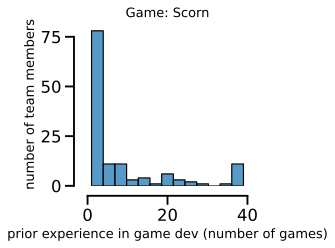

In [319]:
PriorWorkExp=np.array([len(rcredits[x])-1 for x in rcredits.keys()])

df = pd.DataFrame(PriorWorkExp)
df.columns=['prior experience in game dev (number of games)']
# Custom colors
palette = {"Hungary": "#e5f5f9", "Austria": "#2ca25f"}

# Creating the bar chart
ff = 13
aa=3; bb=3; wspace_=0.5; hspace_=0.3
fig = plt.figure(figsize=(aa, bb))
spec = gridspec.GridSpec(ncols=1, nrows=1, width_ratios=[1], wspace=wspace_, hspace=hspace_, height_ratios=[1])

# Figure
ax = fig.add_subplot(spec[0])
ax = sns.histplot(x='prior experience in game dev (number of games)', data=df, palette=palette)
plt.ylabel('number of team members', fontsize=ff)
plt.xlabel("prior experience in game dev (number of games)", fontsize=ff)
plt.title("Game: Scorn", fontsize=ff)
# plt.ylim(0, max(df['Percentage']) + 5)
sns.despine(offset=10, trim=True)

# Show the plot
plt.savefig("Scorn Indivual experience.svg",dpi=300, bbox_inches = "tight")
plt.savefig("Scorn Indivual experience.pdf",dpi=300, bbox_inches = "tight")

### Joint Experience

In [26]:
RolesAndPeople

NameError: name 'RolesAndPeople' is not defined

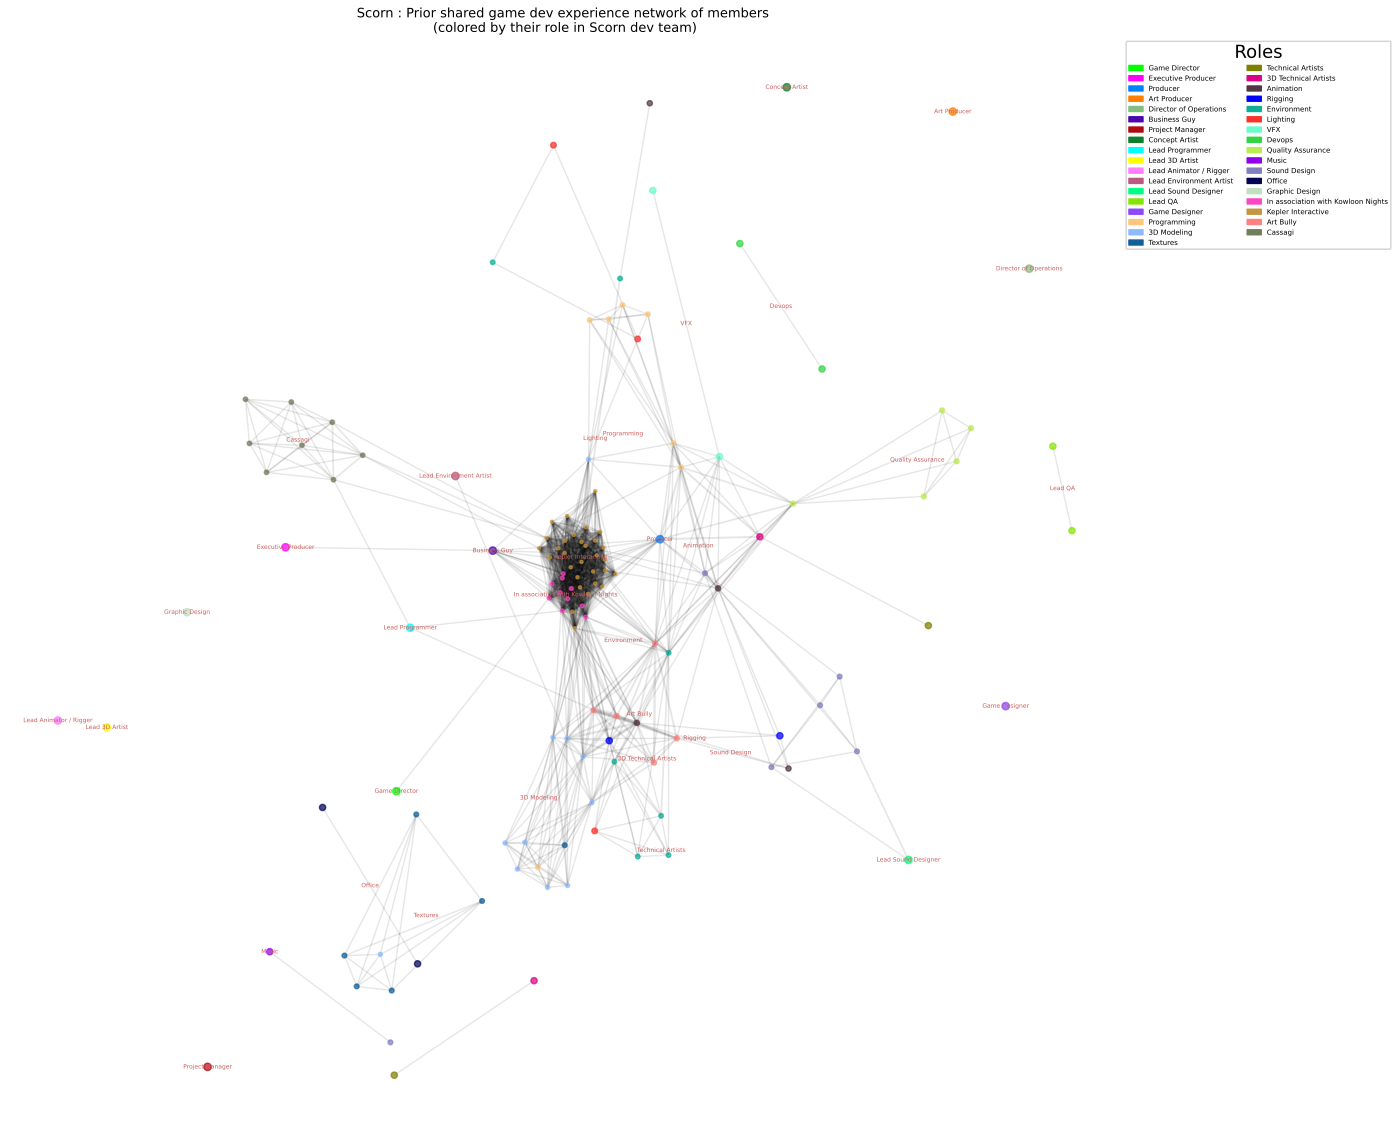

In [318]:

# Assuming you have the roles data structured as mentioned
roles_data = RolesAndPeople.copy()

# Reverse mappingfrom person to role
person_to_role = {}
for role, persons in roles_data.items():
    for person in persons:
        person_to_role[person] = role

# Create a list of unique roles
unique_roles = list(roles_data.keys())

# Assign a unique color to each role
colors = list(mcolors.CSS4_COLORS.values())  # Using CSS4 colors
# number of colours to generate
N = 36
# generate N visually distinct colours
role_to_color = dict(zip(unique_roles, distinctipy.get_colors(len(unique_roles))))
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
# Reverse mapping from person to role and count roles
person_to_role = {}
role_counts = {}
for role, persons in roles_data.items():
    role_counts[role] = len(persons)
    for person in persons:
        person_to_role[person] = role

# Calculate inverse role frequencies for node sizes
max_count = max(role_counts.values())
role_to_size = {role: (100*max_count / count)**.5 for role, count in role_counts.items()}

def calculate_shared_credits(rcredits):
    # Extract unique credits for each member
    unique_credits = {k: set(v) for k, v in rcredits.items()}

    # Calculate shared credits
    shared_credits = {}
    for (member1, credits1), (member2, credits2) in combinations(unique_credits.items(), 2):
        shared = credits1.intersection(credits2)
        shared_credits[(member1, member2)] = len(shared)

    return shared_credits
shared_credits=calculate_shared_credits(rcredits)

def create_network(shared_credits):
    G = nx.Graph()

    # Add edges with weights
    for (member1, member2), weight in shared_credits.items():
        if weight > 1:  # Add an edge only if there are shared credits
            G.add_edge(member1, member2, weight=weight)

    return G


def build_and_plot_network(person_to_role, role_to_color):
    # Build the network
#     G = nx.Graph()
    G = create_network(shared_credits)
    for person in person_to_role:
        G.add_node(person, role=person_to_role[person])
    ff = 13
    aa=20; bb=20; wspace_=0.5; hspace_=0.3
    fig = plt.figure(figsize=(aa, bb))
    spec = gridspec.GridSpec(ncols=1, nrows=1, width_ratios=[1], wspace=wspace_, hspace=hspace_, height_ratios=[1])

    # Figure
    ax = fig.add_subplot(spec[0])

    # Apply colors to nodes based on roles
    node_colors = [role_to_color[person_to_role[node]] for node in G.nodes()]
    noddesize = [role_to_size[person_to_role[node]] for node in G.nodes()]
        
    
    # Plot the network
    pos = nx.spring_layout(G, k=0.2, iterations=20)
#     nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray")

    # Edges
    weights = [(G[u][v]['weight'])**.5 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, alpha=0.1, width=weights)

    # Nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors,alpha=.7,node_size=noddesize)    
    # Label roles at centroids
    role_positions = {role: np.mean([pos[node] for node in G if person_to_role[node] == role], axis=0) 
                      for role in roles_data.keys()}
    for role, position in role_positions.items():
        plt.text(position[0], position[1], role, fontsize=6, ha='center', va='center',color='IndianRed')

        
    plt.title("Scorn : Prior shared game dev experience network of members \n(colored by their role in Scorn dev team)", fontsize=ff)
    legend_handles = [Patch(color=role_to_color[role], label=role) for role in unique_roles]
    plt.legend(handles=legend_handles,bbox_to_anchor=[1,1,], loc='upper left', title='Roles', fontsize=ff-6,ncol=2)

#     plt.show()
    plt.axis('off')

# Build and plot the network
build_and_plot_network(person_to_role, role_to_color)

plt.savefig("Scorn Prior Collabs.svg",dpi=300, bbox_inches = "tight")
plt.savefig("Scorn Prior Collabs.pdf",dpi=500, bbox_inches = "tight")

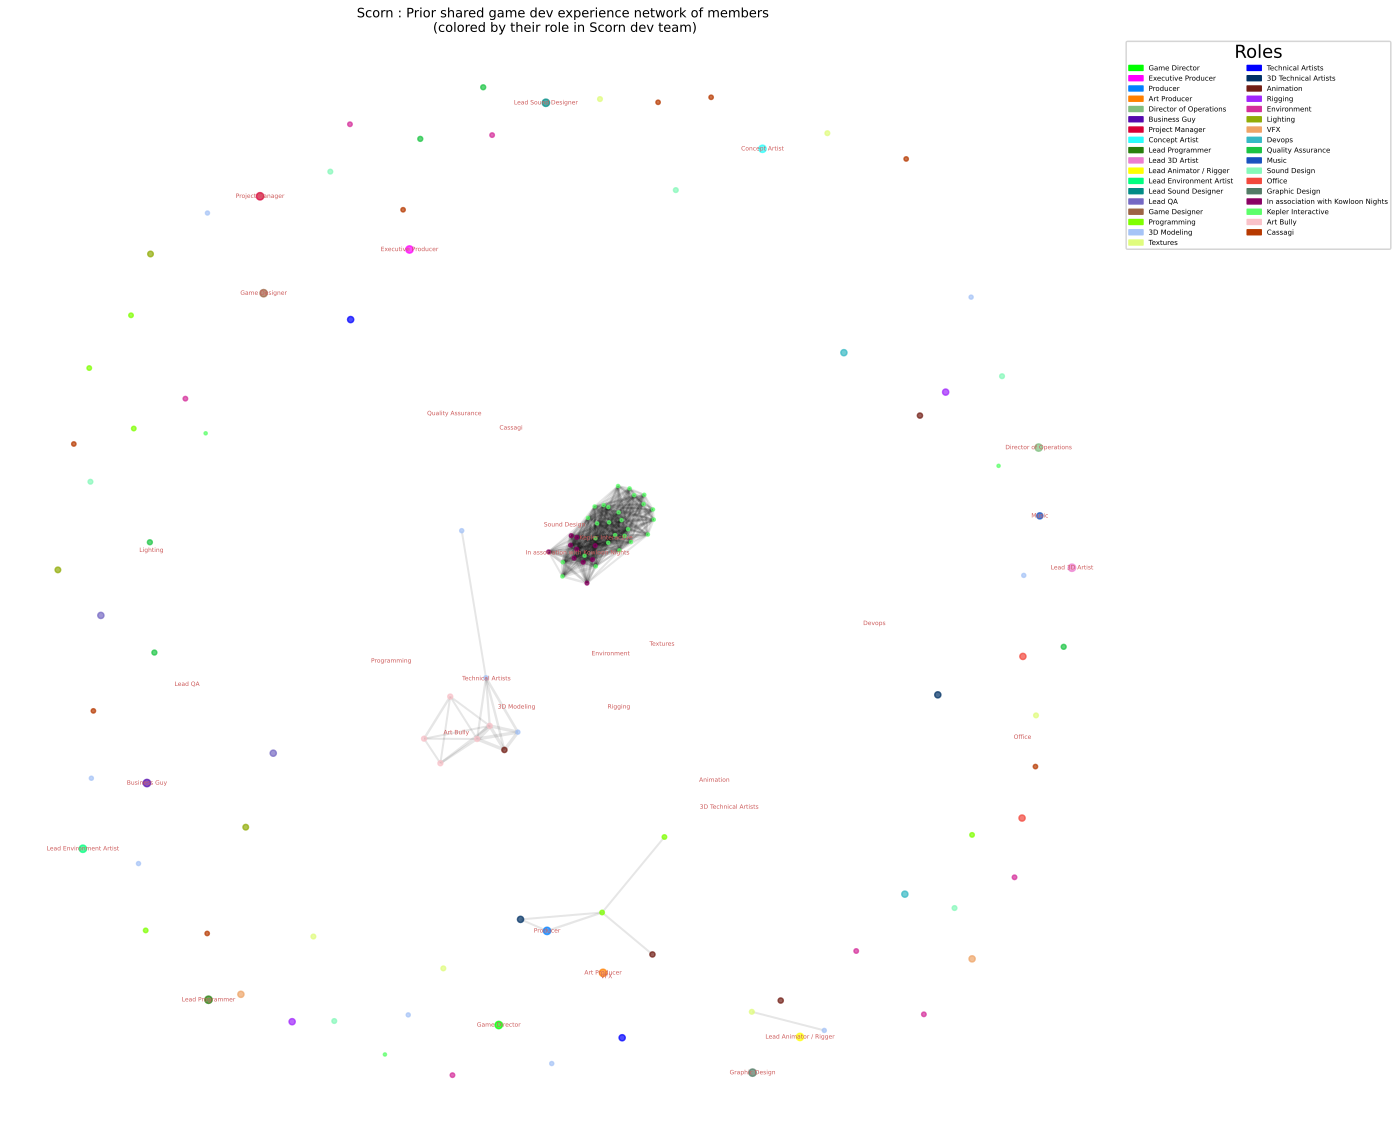

In [321]:

# Assuming you have the roles data structured as mentioned
roles_data = RolesAndPeople.copy()

# Reverse mappingfrom person to role
person_to_role = {}
for role, persons in roles_data.items():
    for person in persons:
        person_to_role[person] = role

# Create a list of unique roles
unique_roles = list(roles_data.keys())

# Assign a unique color to each role
colors = list(mcolors.CSS4_COLORS.values())  # Using CSS4 colors
# number of colours to generate
N = 36
# generate N visually distinct colours
role_to_color = dict(zip(unique_roles, distinctipy.get_colors(len(unique_roles))))
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
# Reverse mapping from person to role and count roles
person_to_role = {}
role_counts = {}
for role, persons in roles_data.items():
    role_counts[role] = len(persons)
    for person in persons:
        person_to_role[person] = role

# Calculate inverse role frequencies for node sizes
max_count = max(role_counts.values())
role_to_size = {role: (100*max_count / count)**.5 for role, count in role_counts.items()}

def calculate_shared_credits(rcredits):
    # Extract unique credits for each member
    unique_credits = {k: set(v) for k, v in rcredits.items()}

    # Calculate shared credits
    shared_credits = {}
    for (member1, credits1), (member2, credits2) in combinations(unique_credits.items(), 2):
        shared = credits1.intersection(credits2)
        shared_credits[(member1, member2)] = len(shared)

    return shared_credits
shared_credits=calculate_shared_credits(rcredits)

def create_network(shared_credits):
    G = nx.Graph()

    # Add edges with weights
    for (member1, member2), weight in shared_credits.items():
        if weight > 3:  # Add an edge only if there are shared credits
            G.add_edge(member1, member2, weight=weight)

    return G


def build_and_plot_network(person_to_role, role_to_color):
    # Build the network
#     G = nx.Graph()
    G = create_network(shared_credits)
    for person in person_to_role:
        G.add_node(person, role=person_to_role[person])
    ff = 13
    aa=20; bb=20; wspace_=0.5; hspace_=0.3
    fig = plt.figure(figsize=(aa, bb))
    spec = gridspec.GridSpec(ncols=1, nrows=1, width_ratios=[1], wspace=wspace_, hspace=hspace_, height_ratios=[1])

    # Figure
    ax = fig.add_subplot(spec[0])

    # Apply colors to nodes based on roles
    node_colors = [role_to_color[person_to_role[node]] for node in G.nodes()]
    noddesize = [role_to_size[person_to_role[node]] for node in G.nodes()]
        
    
    # Plot the network
    pos = nx.spring_layout(G, k=0.2, iterations=20)
#     nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray")

    # Edges
    weights = [(G[u][v]['weight'])**.5 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, alpha=0.1, width=weights)

    # Nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors,alpha=.7,node_size=noddesize)    
    # Label roles at centroids
    role_positions = {role: np.mean([pos[node] for node in G if person_to_role[node] == role], axis=0) 
                      for role in roles_data.keys()}
    for role, position in role_positions.items():
        plt.text(position[0], position[1], role, fontsize=6, ha='center', va='center',color='IndianRed')

        
    plt.title("Scorn : Prior shared game dev experience network of members \n(colored by their role in Scorn dev team)", fontsize=ff)
    legend_handles = [Patch(color=role_to_color[role], label=role) for role in unique_roles]
    plt.legend(handles=legend_handles,bbox_to_anchor=[1,1,], loc='upper left', title='Roles', fontsize=ff-6,ncol=2)

#     plt.show()
    plt.axis('off')

# Build and plot the network
build_and_plot_network(person_to_role, role_to_color)

plt.savefig("Scorn Prior Collabs _filtered>3 prior collabs only.svg",dpi=300, bbox_inches = "tight")
plt.savefig("Scorn Prior Collabs_filtered>3 prior collabs only.pdf",dpi=500, bbox_inches = "tight")

In [ ]:

# Assuming you have the roles data structured as mentioned
roles_data = RolesAndPeople.copy()

# Reverse mappingfrom person to role
person_to_role = {}
for role, persons in roles_data.items():
    for person in persons:
        person_to_role[person] = role

# Create a list of unique roles
unique_roles = list(roles_data.keys())

# Assign a unique color to each role
colors = list(mcolors.CSS4_COLORS.values())  # Using CSS4 colors
# number of colours to generate
N = 36
# generate N visually distinct colours
role_to_color = dict(zip(unique_roles, distinctipy.get_colors(len(unique_roles))))
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
# Reverse mapping from person to role and count roles
person_to_role = {}
role_counts = {}
for role, persons in roles_data.items():
    role_counts[role] = len(persons)
    for person in persons:
        person_to_role[person] = role

# Calculate inverse role frequencies for node sizes
max_count = max(role_counts.values())
role_to_size = {role: (100*max_count / count)**.5 for role, count in role_counts.items()}

def calculate_shared_credits(rcredits):
    # Extract unique credits for each member
    unique_credits = {k: set(v) for k, v in rcredits.items()}

    # Calculate shared credits
    shared_credits = {}
    for (member1, credits1), (member2, credits2) in combinations(unique_credits.items(), 2):
        shared = credits1.intersection(credits2)
        shared_credits[(member1, member2)] = len(shared)

    return shared_credits
shared_credits=calculate_shared_credits(rcredits)

def create_network(shared_credits):
    G = nx.Graph()

    # Add edges with weights
    for (member1, member2), weight in shared_credits.items():
        if weight > 2:  # Add an edge only if there are shared credits
            G.add_edge(member1, member2, weight=weight)

    return G


def build_and_plot_network(person_to_role, role_to_color):
    # Build the network
#     G = nx.Graph()
    G = create_network(shared_credits)
    for person in person_to_role:
        G.add_node(person, role=person_to_role[person])
    ff = 13
    aa=20; bb=20; wspace_=0.5; hspace_=0.3
    fig = plt.figure(figsize=(aa, bb))
    spec = gridspec.GridSpec(ncols=1, nrows=1, width_ratios=[1], wspace=wspace_, hspace=hspace_, height_ratios=[1])

    # Figure
    ax = fig.add_subplot(spec[0])

    # Apply colors to nodes based on roles
    node_colors = [role_to_color[person_to_role[node]] for node in G.nodes()]
    noddesize = [role_to_size[person_to_role[node]] for node in G.nodes()]
        
    
    # Plot the network
    pos = nx.spring_layout(G, k=0.2, iterations=20)
#     nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray")

    # Edges
    weights = [(G[u][v]['weight'])**.5 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, alpha=0.1, width=weights)

    # Nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors,alpha=.7,node_size=noddesize)    
    # Label roles at centroids
    role_positions = {role: np.mean([pos[node] for node in G if person_to_role[node] == role], axis=0) 
                      for role in roles_data.keys()}
    for role, position in role_positions.items():
        plt.text(position[0], position[1], role, fontsize=6, ha='center', va='center',color='IndianRed')

        
    plt.title("Scorn : Prior shared game dev experience network of members \n(colored by their role in Scorn dev team)", fontsize=ff)
    legend_handles = [Patch(color=role_to_color[role], label=role) for role in unique_roles]
    plt.legend(handles=legend_handles,bbox_to_anchor=[1,1,], loc='upper left', title='Roles', fontsize=ff-6,ncol=2)

#     plt.show()
    plt.axis('off')

# Build and plot the network
build_and_plot_network(person_to_role, role_to_color)

plt.savefig("Scorn Prior Collabs _filtered>2 prior collabs only.svg",dpi=300, bbox_inches = "tight")
plt.savefig("Scorn Prior Collabs_filtered>2 prior collabs only.pdf",dpi=500, bbox_inches = "tight")

# Baldur's Gate III

In [3]:
########################################################## 
##download number of games on which people were credited
##########################################################

def downloadCredits(url):
# URL of the page to scrape

    # Send a request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


    td_elements = soup.find_all('td')
    td_elements[31]
    # Find all <a> tags within this <td> element
    hrefs=[];roles=[]
    for td_element in td_elements:
        a_tags = td_element.find_all('a')

    # Extract the hrefs from each <a> tag
        hrefs.append([a.get('href') for a in a_tags])
        roles.append(td_element.get_text().strip())

    return hrefs,roles

url='https://www.mobygames.com/game/150689/baldurs-gate-iii/credits/windows/?autoplatform=true'
url='https://www.mobygames.com/game/150689/baldurs-gate-iii/credits/windows/'

hrefs,roles=   downloadCredits(url) 
# 

In [4]:
hrefs=hrefs[0:257]
roles=roles[0:257]
RolesAndPeople={r:h for r,h in zip(roles[0::2],hrefs[1::2])}
with open(path_career+'RolesAndPeople_'+url.split('/')[-4]+'.pkl', 'wb') as f:
    pickle.dump(RolesAndPeople, f)

In [5]:
# NUMBER OF TEAM MEMBERS IN GAME DEV  TEAM
len(np.unique(np.concatenate(list(RolesAndPeople.values()))))


330

In [6]:
game_devs=np.unique(np.concatenate(list(RolesAndPeople.values())))

In [7]:
len(game_devs)



330

In [8]:
creditlinks = np.concatenate(hrefs[1::2])
total_urls = len(creditlinks)
processed_urls = 0
soup_credits = []

# Function to process a batch of URLs
def process_batch(urls):
    global processed_urls
    with ThreadPoolExecutor(max_workers=10) as executor:
        future_to_url = {executor.submit(fetch_and_parse, url): url for url in urls}

        for future in as_completed(future_to_url):
            soup = future.result()
            processed_urls += 1
            if soup:
                soup_credits.append(soup)
            print(f"Processed {processed_urls}/{total_urls} URLs", end='\r')

# Split creditlinks into smaller lists of 50 links
batch_size = 50
creditlink_batches = [creditlinks[i:i + batch_size] for i in range(0, len(creditlinks), batch_size)]

# Process each batch sequentially
for batch in creditlink_batches:
    process_batch(batch)
    time.sleep(5)  # Wait for 3 seconds before retrying


Failed to retrieve the webpage. Status code: 404
Failed to retrieve the webpage. Status code: 404


In [11]:
########################################################## 
##download number of games on which people were credited
##########################################################
hcredits=[];rcredits={}
# creditlinks[0]
for soup_credit,p in zip(soup_credits,creditlinks):
    td_elements = soup_credit.find_all('td')
    td_elements
    # Find all <a> tags within this <td> element
    hcredit=[];rcredit=[]
    for td_element in td_elements:
        a_tags = td_element.find_all('a')

    # Extract the hrefs from each <a> tag
        hcredit.append([a.get('href') for a in a_tags])
        rcredit.append(td_element.get_text().strip())
    hcredits.append(hcredit);rcredits[p]=(rcredit);
# roles[0:257]

# with open(path_career+'soup_credit_'+url.split('/')[-4]+'.pkl', 'wb') as f:
#     pickle.dump(soup_credit, f)

<ipython-input-12-0642e362c623>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(x='prior experience in game dev (number of games)', data=df, palette=palette)


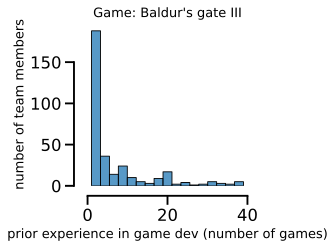

In [12]:
PriorWorkExp_=np.array([len(rcredits[x])-1 for x in rcredits.keys()])



df = pd.DataFrame(PriorWorkExp_)
df.columns=['prior experience in game dev (number of games)']
# Custom colors
palette = {"Hungary": "#e5f5f9", "Austria": "#2ca25f"}

# Creating the bar chart
ff = 13
aa=3; bb=3; wspace_=0.5; hspace_=0.3
fig = plt.figure(figsize=(aa, bb))
spec = gridspec.GridSpec(ncols=1, nrows=1, width_ratios=[1], wspace=wspace_, hspace=hspace_, height_ratios=[1])

# Figure
ax = fig.add_subplot(spec[0])
ax = sns.histplot(x='prior experience in game dev (number of games)', data=df, palette=palette)
plt.ylabel('number of team members', fontsize=ff)
plt.xlabel("prior experience in game dev (number of games)", fontsize=ff)
plt.title("Game: Baldur's gate III", fontsize=ff)
# plt.ylim(0, max(df['Percentage']) + 5)
sns.despine(offset=10, trim=True)

# Show the plot
plt.savefig("Baldur's Gate Individual experience.svg",dpi=300, bbox_inches = "tight")
plt.savefig("Baldur's Gate Individual experience.pdf",dpi=300, bbox_inches = "tight")

### Joint Experience

In [67]:


# Assuming you have the roles data structured as mentioned
roles_data = RolesAndPeople.copy()

# Reverse mappingfrom person to role
person_to_role = {}
for role, persons in roles_data.items():
    for person in persons:
        person_to_role[person] = role

# Create a list of unique roles
unique_roles = list(roles_data.keys())

# Assign a unique color to each role
colors = list(mcolors.CSS4_COLORS.values())  # Using CSS4 colors
# number of colours to generate
# generate N visually distinct colours
role_to_color = dict(zip(unique_roles, distinctipy.get_colors(len(unique_roles))))
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
# Reverse mapping from person to role and count roles
person_to_role = {}
role_counts = {}
for role, persons in roles_data.items():
    role_counts[role] = len(persons)
    for person in persons:
        person_to_role[person] = role

# Calculate inverse role frequencies for node sizes
max_count = max(role_counts.values())
role_to_size = {role: (100*max_count / count)**.5 for role, count in role_counts.items()}

def calculate_shared_credits(rcredits):
    # Extract unique credits for each member
    unique_credits = {k: set(v) for k, v in rcredits.items()}

    # Calculate shared credits
    shared_credits = {}
    for (member1, credits1), (member2, credits2) in combinations(unique_credits.items(), 2):
        shared = credits1.intersection(credits2)
        shared_credits[(member1, member2)] = len(shared)

    return shared_credits
shared_credits=calculate_shared_credits(rcredits)

def create_network(shared_credits):
    G = nx.Graph()

    # Add edges with weights
    for (member1, member2), weight in shared_credits.items():
        if weight > MIN_FILTER_COLLABS:  # Add an edge only if there are shared credits
            G.add_edge(member1, member2, weight=weight)

    return G


def build_and_plot_network(person_to_role, role_to_color):
    ff = 13
    aa=15; bb=15; wspace_=0.5; hspace_=0.3
    fig = plt.figure(figsize=(aa, bb))
    spec = gridspec.GridSpec(ncols=1, nrows=1, width_ratios=[1], wspace=wspace_, hspace=hspace_, height_ratios=[1])

    # Figure
    ax = fig.add_subplot(spec[0])
  

    # Build the network
#     G = nx.Graph()
    G = create_network(shared_credits)
    for person in person_to_role:
        G.add_node(person, role=person_to_role[person])
    nodes=list(G.nodes())
    for node in nodes:
        if node not in person_to_role.keys():
            G.remove_node(node)
    # Apply colors to nodes based on roles
    node_colors = [role_to_color[person_to_role[node]] for node in G.nodes()]
    noddesize = [role_to_size[person_to_role[node]] for node in G.nodes()]
    node_colorsdict = {node:role_to_color[person_to_role[node]] for node in G.nodes()}
        
    
    # Plot the network
    pos = nx.spring_layout(G, k=nodedistance, iterations=20)
#     nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray")

    # Edges
    weights = [(G[u][v]['weight'])**.5 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, alpha=0.1, width=weights)

    # Nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors,alpha=.7,node_size=noddesize)    
    # Label roles at centroids
    role_positions = {role: np.mean([pos[node] for node in G if person_to_role[node] == role], axis=0) 
                      for role in roles_data.keys()}
    role_colors = {role: [node_colorsdict[node] for node in G if person_to_role[node] == role][0]
                      for role in roles_data.keys()}
    for role, position in role_positions.items():
        col=role_colors[role]
        plt.text(position[0], position[1], role, fontsize=4, ha='center', va='center',color=col)

        
    plt.title("Baldur's gate III: Who worked with who? \nPrior shared game dev experience network of members \n(colored by their role in Baldur's gate III dev team)", fontsize=ff)
    legend_handles = [Patch(color=role_to_color[role], label=role) for role in unique_roles]
    plt.legend(handles=legend_handles,bbox_to_anchor=[1,1,], loc='upper left', title='Roles', fontsize=ff-6,ncol=2)

#     plt.show()
    plt.axis('off')

# Build and plot the network
MIN_FILTER_COLLABS=2
nodedistance=.3
build_and_plot_network(person_to_role, role_to_color)

plt.savefig("Baldur's Gate III Prior Collabs"+str(MIN_FILTER_COLLABS)+".svg",dpi=500, bbox_inches = "tight")
plt.savefig("Baldur's Gate III Prior Collabs"+str(MIN_FILTER_COLLABS)+".pdf",dpi=500, bbox_inches = "tight")

KeyboardInterrupt: 

In [27]:
nodes=list(G.nodes())
len(G.nodes)

305

In [34]:
roles_data

{'Directed by': ['https://www.mobygames.com/person/109090/swen-vincke/'],
 'Produced by': ['https://www.mobygames.com/person/156386/david-walgrave/'],
 'Animation Director': ['https://www.mobygames.com/person/385376/thierry-van-gyseghem/'],
 'Art Director': ['https://www.mobygames.com/person/385369/joachim-vleminckx/'],
 'Audio Director': ['https://www.mobygames.com/person/367025/stefan-randelshofer/'],
 'Cinematic Director': ['https://www.mobygames.com/person/481408/jason-latino/'],
 'Composer / Music Director': ['https://www.mobygames.com/person/153796/borislav-slavov/'],
 'PR & Communications Director': ['https://www.mobygames.com/person/754432/molly-carroll/'],
 'Performance Director': ['https://www.mobygames.com/person/295175/greg-lidstone/'],
 'Publishing Director': ['https://www.mobygames.com/person/663504/michael-douse/'],
 'QA Director': ['https://www.mobygames.com/person/385362/octaaf-fieremans/'],
 'Scripting Director': ['https://www.mobygames.com/person/486390/bert-stevens/

# Multiple roles: strethed too thin? 
+ these people should be good at vision alignment and brokering between different parts of the development team

In [79]:
# RolesAndPeople

In [80]:


# Initialize a dictionary to count roles per person
person_roles_count = {}

# Initialize a dictionary to track shared roles
shared_roles = {}

# Loop through the dictionary to count the roles and find shared roles
for role, people in RolesAndPeople.items():
    for person in people:
        # Count roles per person
        if person in person_roles_count:
            person_roles_count[person] += 1
        else:
            person_roles_count[person] = 1
        
        # Find shared roles
        for other_role, other_people in RolesAndPeople.items():
            if role != other_role:  # Avoid comparing the role with itself
                if any(person in other_people for person in people):
                    # Sort the tuple to avoid duplicates like (Role1, Role2) and (Role2, Role1)
                    roles_pair = tuple(sorted([role, other_role]))
                    if roles_pair in shared_roles:
                        shared_roles[roles_pair] += 1
                    else:
                        shared_roles[roles_pair] = 1

# Sorting the shared roles by the number of shared people
shared_roles_sorted = sorted(shared_roles.items(), key=lambda item: item[1], reverse=True)

# Preparing the results
roles_per_person = len(person_roles_count)
most_shared_roles = shared_roles_sorted[0] if shared_roles_sorted else None

roles_per_person, most_shared_roles


(132, (('In association with Kowloon Nights', 'Kepler Interactive'), 45))

In [82]:
# person_roles_count